In [11]:
import pandas as pd

In [14]:
messages = pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/EDA-FeatureEng-FeatureSelection-Prediction/NLP/SPAM Classifier/SMSSpamCollection", sep='\t', names=['label', 'message'])

In [15]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Cleaning the data

In [12]:
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [13]:
ps = PorterStemmer()

In [26]:
corpus = []
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [28]:
corpus[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

## Creating the Bag of Words

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(corpus).toarray()

In [34]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
x.shape

(5572, 5000)

In [36]:
label = pd.get_dummies(messages['label'], drop_first=True)

In [38]:
label.shape

(5572, 1)

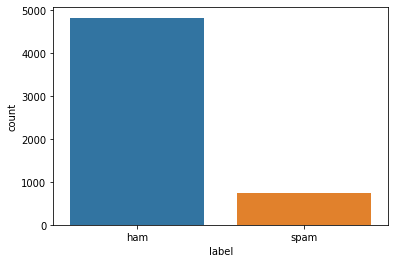

In [48]:
import seaborn as sns
sns.countplot(messages['label'])

## Train Test split

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, label, test_size = 0.2, random_state = 0)

## Training model with Naive Bayes Classifier

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_score

In [42]:
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train, y_train)

/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

In [43]:
pred = naive_bayes.predict(x_test)

In [44]:
print(confusion_matrix(y_test, pred))

[[946   9]
 [  8 152]]


In [45]:
print(precision_score(y_test, pred))

0.9440993788819876


In [ ]:
label